In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from disp import set_plot


LOOKBACK = 1800
DATA_DIR = f'data/simple/s5/lookback_{LOOKBACK}'

FNAMES = [fname for fname in os.listdir(DATA_DIR) if fname.endswith('.npy')]
PATHS = [os.path.join(DATA_DIR, fname) for fname in FNAMES]

In [2]:
datas = [np.load(path, allow_pickle=True)[0] for path in PATHS]
r2_mns = []
r2_sems = []
hparam_strs = []

for data in datas:
    r2_mns.append(data['r2_bests'].mean())
    r2_sems.append(data['r2_bests'].std()/np.sqrt(30))
    d_model = data['d_model']
    n_layer = data['n_layer']
    ssm_size = data['ssm_size']
    lr = data['lr']
    
    hparam_str = f'D_MODEL {d_model}, N_LAYER {n_layer},\nSSM_SIZE {ssm_size}, LR_{lr}'  #\nLOOKBACK {LOOKBACK}'
    hparam_strs.append(hparam_str)
    
idx_best = np.argmax(r2_mns)

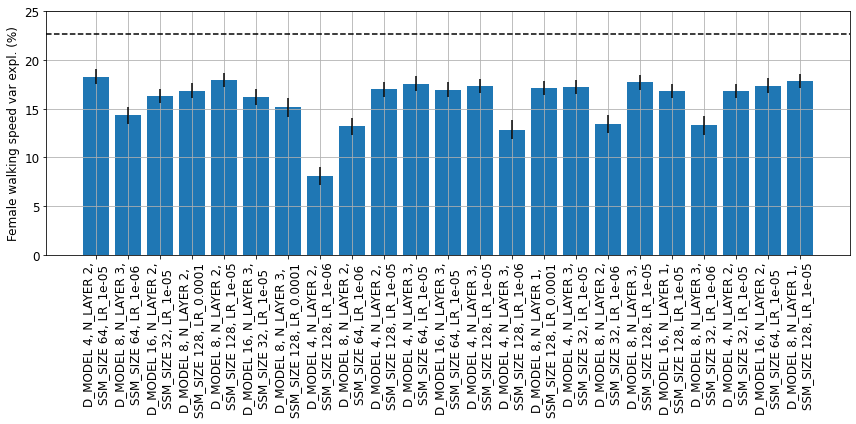

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), tight_layout=True)
ax.bar(np.arange(len(datas)), 100*np.array(r2_mns), yerr=100*np.array(r2_sems))
x_ticks = np.arange(len(datas))
ax.set_xticks(x_ticks)
ax.set_xticklabels(hparam_strs, rotation=90)

ax.axhline(22.678787, c='k', ls='--')

set_plot(ax, y_lim=(0, 25), y_label='Female walking speed var expl. (%)')
ax.grid()

fig.savefig('supp/s19_hparam_sweep_s5.svg')

In [4]:
print(np.max(r2_mns))

0.18300076723098754
